# LAB_02

# harris corner detector

In [219]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

(484, 1056)


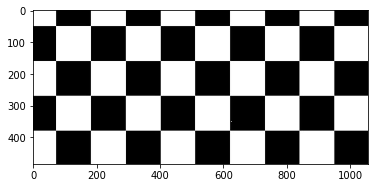

In [220]:
#image = cv2.imread('C:\\Users\\Tarmah\\Desktop\\Lab_02\\me.jpg',0)
PATH = "C:\\Users\\Tarmah\\Desktop\\Lab_02\\Lab-02_Image.PNG"

image = cv2.imread(PATH,0)
print(image.shape)
plt.imshow(image , cmap=plt.get_cmap('gray'))
plt.show()

### X and Y gradients

In [221]:
I_x = cv2.Sobel(image,cv2.CV_64F,1,0,ksize=3)  # x
I_y = cv2.Sobel(image,cv2.CV_64F,0,1,ksize=3)  # y

### Calculate Gaussian Of Gradients

In [222]:
Ixx = cv2.GaussianBlur(I_x**2,(5,5),1)
Ixy = cv2.GaussianBlur(I_y*I_x,(5,5),1)
Iyy = cv2.GaussianBlur(I_y**2,(5,5),1)

### Compute Response at Each Pixel

In [223]:
k = 0.05
height, width = image.shape
w=0
harris_response = []
window_size = 6
offset = int(window_size/2)
for y in range(offset, height-offset):
    for x in range(offset, width-offset):
        Sxx = np.sum(Ixx[y-offset:y+1+offset, x-offset:x+1+offset])
        Syy = np.sum(Iyy[y-offset:y+1+offset, x-offset:x+1+offset])
        Sxy = np.sum(Ixy[y-offset:y+1+offset, x-offset:x+1+offset])
        
        #Find determinant and trace, use to get corner response
        det = (Sxx * Syy) - (Sxy**2)
        trace = Sxx + Syy
        r = det - k*(trace**2)
        
        harris_response.append(r)
    w+=1

### Reshaping List (harris_response)

In [224]:
harris_response = np.asarray(harris_response)
harris_response = harris_response.reshape(w,len(harris_response)//w)
harris_response.shape

(478, 1050)

### Labelling Corners

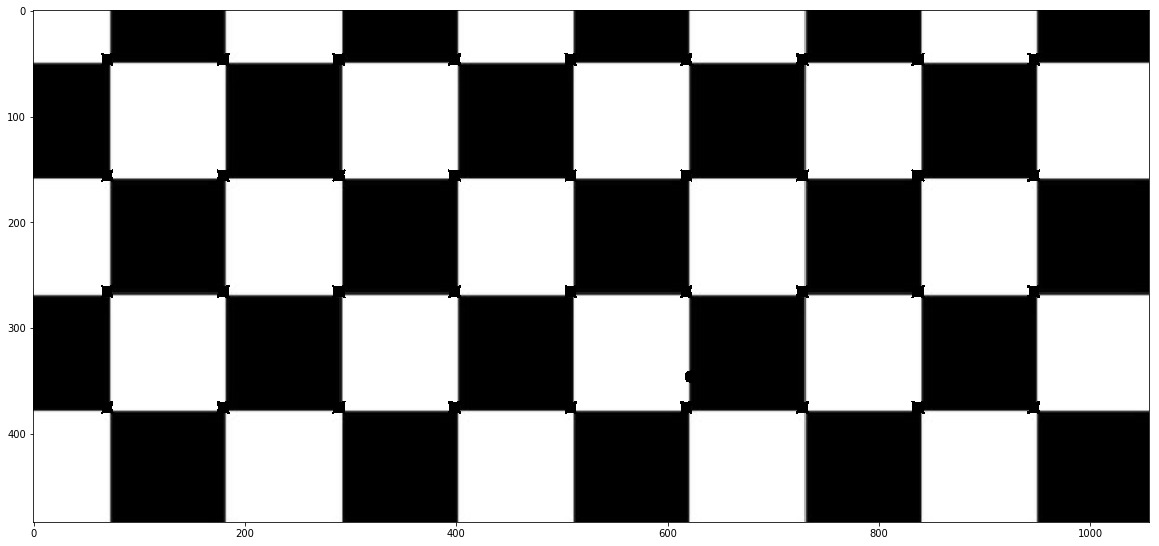

In [225]:
img_copy_for_corners = np.copy(image)

for rowindex, response in enumerate(harris_response):
    for colindex, r in enumerate(response):
        if r > 10000000000:
            # this is a corner
            img_copy_for_corners[rowindex, colindex] = 0

plt.figure(figsize=(20,20))
plt.imshow(img_copy_for_corners, cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
%reset